In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:54<00:00, 21.5MB/s]
100% 1.06G/1.06G [00:54<00:00, 21.1MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout



In [5]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
     directory='/content/train',
     labels='inferred',
     label_mode='int',
     batch_size=32,
     image_size=(256, 256)
)


 #validation of data
validation_ds = keras.utils.image_dataset_from_directory(
     directory='/content/test',
     labels='inferred',
     label_mode='int',
     batch_size=32,
     image_size=(256, 256)
)
 #these file sare stored in numpy array  so tamke it 0 to 1 istead by default 0 to 256

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [7]:
#create cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 108ms/step - loss: 1.3431 - accuracy: 0.5979 - val_loss: 0.6060 - val_accuracy: 0.6672
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5576 - accuracy: 0.7139 - val_loss: 0.6153 - val_accuracy: 0.6386
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4967 - accuracy: 0.7630 - val_loss: 0.5981 - val_accuracy: 0.6902
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4323 - accuracy: 0.8007 - val_loss: 0.5571 - val_accuracy: 0.7084
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3674 - accuracy: 0.8367 - val_loss: 0.6218 - val_accuracy: 0.6874
Epoch 6/10
625/625 [==============================] - 78s 124ms/step - loss: 0.3011 - accuracy: 0.8679 - val_loss: 0.5427 - val_accuracy: 0.8016
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2247 - accuracy: 0.9075 - val_loss: 0.5199 - val_ac

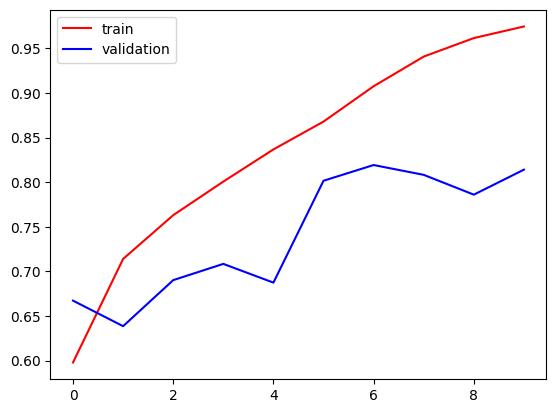

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



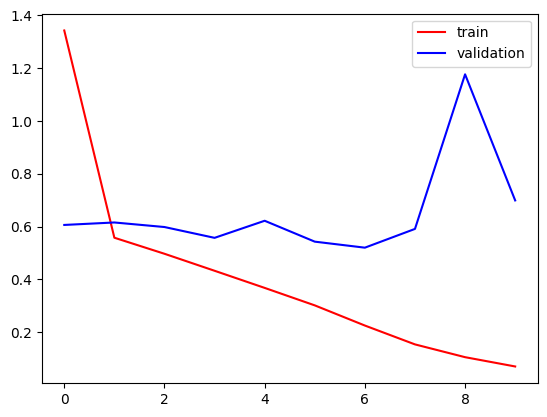

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [20]:
test_img = cv2.imread('/content/dog.jpg')

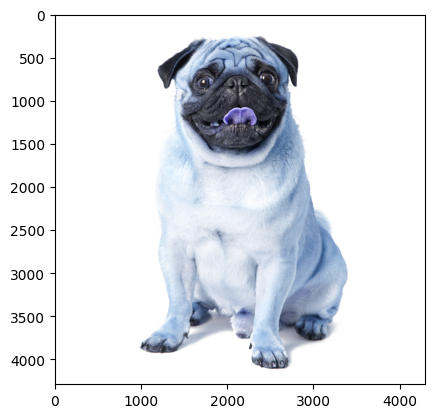

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(4288, 4289, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 1s 574ms/step


array([[1.]], dtype=float32)